# Health Care Project  Predicting Length of Stay

Project By

 Siddhesh Dwarkanath Munagekar : W0747944


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip install pandas-profiling
!pip install -U pandas-profiling
import pandas_profiling 
from pandas_profiling import ProfileReport

from keras.preprocessing.image import load_img
from google.colab import drive
drive.mount('/content/drive')



     - 38.1MB 951kB/s
     |████████████████████████████████| 10.1MB 7.5MB/s 
     |████████████████████████████████| 645kB 46.6MB/s 
     |████████████████████████████████| 112kB 58.0MB/s 
     |████████████████████████████████| 1.1MB 44.7MB/s 
     |████████████████████████████████| 3.1MB 44.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
     |████████████████████████████████| 296kB 42.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=d085fca0b2c7ad65899b068028265f8c415fd215c7b9e538c29f7697ee0e6ee8
  Stored in directory: /tmp/pip-ephem-wheel-cache-hr4igz3r/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=d685b4ae9944d018f34f859ccd51ed551f1d3c89484a9e5890b1066192dc2ce1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f940

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)
Mounted at /content/drive


In [2]:
data =pd.read_csv('/content/drive/My Drive/HEALTH_CARE_ANALYTICS/length_of_stay.csv')
data.head(10)
data.Stay.unique()

data 



case_id  Hospital_code  ... Stay_category  Age_Category
0             1              8  ...           5.0          55.5
1             7             32  ...           5.0          55.5
2            13             16  ...           5.0          55.5
3            15              6  ...           5.0          75.5
4            16              6  ...           5.0          75.5
...         ...            ...  ...           ...           ...
318433   317189             26  ...         105.0          25.5
318434   317190             26  ...         105.0          25.5
318435   317433             26  ...         105.0          65.5
318436   318278             26  ...         105.0          45.5
318437   318326             11  ...         105.0          35.5

[318438 rows x 20 columns]

# Exploratory Data Analysis

In [3]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Note :**If Pandas profiling fails to open try restaring runtime or choose option restart and run all

In [4]:
##data.shape
data['Stay_category'].unique()

data['Stay_category'].dtypes


data.dtypes

case_id                    int64
Hospital_code              int64
Hospital_type_code        object
City_Code_Hospital         int64
Hospital_region_code      object
Available_Extra_Rooms      int64
Department                object
Ward_Type                 object
Ward_Facility_Code        object
Bed_Grade                float64
patientid                  int64
City_Code_Patient        float64
Type_of_Admission         object
Severity_of_Illness       object
Visitors_with_Patient      int64
Age                       object
Admission_Deposit          int64
Stay                      object
Stay_category            float64
Age_Category             float64
dtype: object

In [5]:

data['Stay_category'].unique()

data[data['Stay_category']>35.5].count()

#data.count()

case_id                  74045
Hospital_code            74045
Hospital_type_code       74045
City_Code_Hospital       74045
Hospital_region_code     74045
Available_Extra_Rooms    74045
Department               74045
Ward_Type                74045
Ward_Facility_Code       74045
Bed_Grade                74012
patientid                74045
City_Code_Patient        72853
Type_of_Admission        74045
Severity_of_Illness      74045
Visitors_with_Patient    74045
Age                      74045
Admission_Deposit        74045
Stay                     74045
Stay_category            74045
Age_Category             74045
dtype: int64

##Label Encoding for severity_of_Illness and Type of Admission



In [6]:
illness_map={'Extreme':3,
             'Moderate':2,
             'Minor':1}

admission_map={'Emergency':1,
               'Urgent':2,
               'Trauma':5}
data['Severity_of_Illness_ordinal']=data.Severity_of_Illness.map(illness_map)
data['Type_of_Admission_code']=data.Type_of_Admission.map(admission_map)


In [7]:
data.drop(['Stay','Age'],axis=1)

case_id  ...  Type_of_Admission_code
0             1  ...                       1
1             7  ...                       1
2            13  ...                       1
3            15  ...                       1
4            16  ...                       1
...         ...  ...                     ...
318433   317189  ...                       1
318434   317190  ...                       1
318435   317433  ...                       2
318436   318278  ...                       2
318437   318326  ...                       1

[318438 rows x 20 columns]

In [8]:
print(data['Department'].unique())
data.isnull().sum()

['radiotherapy' 'gynecology' 'TB & Chest disease' 'anesthesia' 'surgery']


case_id                           0
Hospital_code                     0
Hospital_type_code                0
City_Code_Hospital                0
Hospital_region_code              0
Available_Extra_Rooms             0
Department                        0
Ward_Type                         0
Ward_Facility_Code                0
Bed_Grade                       113
patientid                         0
City_Code_Patient              4532
Type_of_Admission                 0
Severity_of_Illness               0
Visitors_with_Patient             0
Age                               0
Admission_Deposit                 0
Stay                              0
Stay_category                     0
Age_Category                      0
Severity_of_Illness_ordinal       0
Type_of_Admission_code            0
dtype: int64

# Filling up missing Values in Bedgrade column by analysing the relation

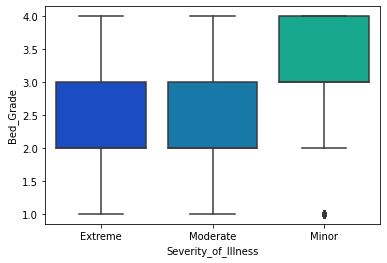

In [9]:
import seaborn as sns
sns.boxplot(x='Severity_of_Illness',y='Bed_Grade',data=data,palette='winter')


In [10]:
#Filling missing values in bed grade column
def impute_bed_grade(cols):
  Bed_Grade=cols[0]
  Severity_of_Illness_ordinal=cols[1]

  if pd.isnull(Bed_Grade):

    if Severity_of_Illness_ordinal ==1:
      return 3.5
    elif Severity_of_Illness_ordinal ==2:
      return 2.5
    else:
      return 2.5

  else:
    return Bed_Grade


In [11]:
data['Bed_Grade']=data[['Bed_Grade','Severity_of_Illness_ordinal']].apply(impute_bed_grade,axis=1)


np.median(data['City_Code_Patient'])

nan

# Filling up the missing data for City code Patient

Text(0.5, 1.0, 'Right Skewed Histogram of City_Code_Patient')

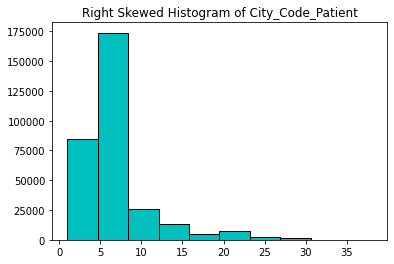

In [12]:
plt.hist(data['City_Code_Patient'],color='c',edgecolor='black')
plt.title("Right Skewed Histogram of City_Code_Patient")


In [13]:
data['City_Code_Patient']= np.where(data['City_Code_Patient'].isna(),0.0,data['City_Code_Patient'])

# Histogram of Stay Category

Text(0.5, 1.0, 'Right Skewed Histogram of Stay Category')

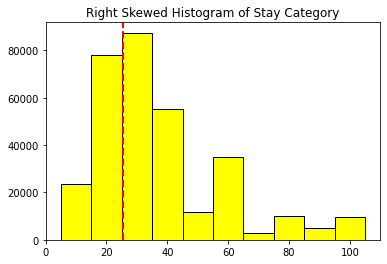

In [14]:
plt.hist(data['Stay_category'],color='yellow',edgecolor='black')
plt.axvline(x=np.median(data['Stay_category']), color='r', linestyle='dashed', linewidth=2)
plt.title("Right Skewed Histogram of Stay Category")
#data['Stay_category']

The Stay Category distribution being rightskewd with meadian being the measure of central tendency.

# Splitting the response variable into two categories

In [15]:
#Create a new column Stay Split
data['Stay_split']=""

####createing a function to split Stay in two categories
def imputer_stay_split(cols):
  Stay_split=cols[0]
  Stay_category=cols[1]

  if Stay_category <= 35.5:
    return 0
  else:
    return 1

data['Stay_split']=data[['Stay_split','Stay_category']].apply(imputer_stay_split,axis=1)

#Converting Stay_Split to categorical datatype
data['Stay_split']=data['Stay_split'].astype('category')
type(data[['Stay_split']])

pandas.core.frame.DataFrame

# Splitting the data into Dependent feature and Independent features


In [16]:
from sklearn.model_selection import train_test_split
X=data[['Department','Available_Extra_Rooms','Bed_Grade','patientid','Visitors_with_Patient','Admission_Deposit','Age_Category','Severity_of_Illness_ordinal',
        'Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']]
y=data[['Stay_split']]
print(X.shape)
print(y.shape)
X['Department'].unique()
y['Stay_split'].dtype

(318438, 12)
(318438, 1)


CategoricalDtype(categories=[0, 1], ordered=False)

# Corelation Plot with Stay Category

In [17]:
#X.corrwith(data.Stay_split).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   #fontsize = 15, rot = 45, grid = True)
X=X.drop(['patientid'],axis=1)
X

Department  ...  City_Code_Hospital
0       radiotherapy  ...                   3
1       radiotherapy  ...                   9
2       radiotherapy  ...                   3
3         gynecology  ...                   6
4         gynecology  ...                   6
...              ...  ...                 ...
318433    gynecology  ...                   2
318434    gynecology  ...                   2
318435  radiotherapy  ...                   2
318436    anesthesia  ...                   2
318437    gynecology  ...                   2

[318438 rows x 11 columns]

# One Hot encoding Department Column

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])]  ,remainder='passthrough')
data=np.array(ct.fit_transform(X))
data
data =pd.DataFrame(data)
data
X_features= data.drop([0],axis='columns')  #  Deleting first column to avoid dummy variable trap
X_features
X_features.columns=['Department_1','Department_2','Department_3','Department_4','Available_Extra_Rooms','Bed_Grade','Visitors_with_Patient','Admission_Deposit','Age_Category',
                   'Severity_of_Illness_ordinal','Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']
X_features.head()

Department_1  Department_2  ...  City_Code_Patient  City_Code_Hospital
0           0.0           0.0  ...                7.0                 3.0
1           0.0           0.0  ...                7.0                 9.0
2           0.0           0.0  ...                7.0                 3.0
3           0.0           1.0  ...                8.0                 6.0
4           0.0           1.0  ...                8.0                 6.0

[5 rows x 14 columns]

# Standardizing Predictors by scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_features)

scaled_features=scaler.transform(X_features)
X_features=pd.DataFrame(scaled_features)

#pd.get_dummies(X['Department'])
X_features.columns=['Department_1','Department_2','Department_3','Department_4','Available_Extra_Rooms','Bed_Grade','Visitors_with_Patient','Admission_Deposit','Age_Category',
                   'Severity_of_Illness_ordinal','Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']
X_features.head(5)


Department_1  Department_2  ...  City_Code_Patient  City_Code_Hospital
0     -0.320416     -1.902171  ...          -0.031040           -0.571055
1     -0.320416     -1.902171  ...          -0.031040            1.362850
2     -0.320416     -1.902171  ...          -0.031040           -0.571055
3     -0.320416      0.525715  ...           0.177771            0.395897
4     -0.320416      0.525715  ...           0.177771            0.395897

[5 rows x 14 columns]

In [20]:
cols    = [i for i in X_features.columns ]
X_features[cols]
y['Stay_split'].shape

(318438,)

# Splitting Data set into Training set and  Testing set

In [21]:

#X_features=np.array(X_features)
#y=np.array(y)
#y=y.flatten()
X_train, X_test, y_train, y_test=train_test_split(X_features[cols],y['Stay_split'],test_size=0.2)

X_train.shape


type(X_features)
X_train.shape

(254750, 14)

# DecisionTreeClassifier Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
deci_tree =DecisionTreeClassifier()
deci_tree.fit(X_train,y_train)
deci_tree_test_score=deci_tree.score(X_test,y_test)
print("Decision Tree test Score",deci_tree_test_score)

Decision Tree test Score 0.7544906418791609


# RandomForestClassifier

In [23]:

from sklearn.ensemble import RandomForestClassifier
random_forest_clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
random_forest_clf.fit(X_train,y_train)
random_frst_test_score=random_forest_clf.score(X_test,y_test)
random_frst_test_score
print("Random forest Test Score ",random_frst_test_score)

Random forest Test Score  0.8164018339404597


In [24]:
#from sklearn.svm import SVR
#from sklearn.multiclass import OneVsRestClassifier
#svr=SVR()
#ovr = OneVsRestClassifier(svc)
#svr.fit(X_train, y_train)
#ovr.score(X_test,y_test)

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000,solver='liblinear')

model.fit(X_train, y_train)
log_reg_test=model.score(X_test,y_test)
print("Logistics Reg Test Score ",log_reg_test)

Logistics Reg Test Score  0.8235303353850019


# eXtreme Gradient Boosting (XGB)

---



In [26]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1000,objective='binary:logistic',max_depth=3)
xgb_clf.fit(X_train,y_train)
test_score=xgb_clf.score(X_test,y_test)
train_score=xgb_clf.score(X_train,y_train)
print("Test score is",test_score," and Train score is ",train_score)

Test score is 0.831129883180505  and Train score is  0.8288635917566242


Precision Score of XGB Classifier is 0.6953005016893621
Recall_score Score  of XGB Classifier is 0.46609471516815376
Accuracy Score of XGB Classifier is 0.831129883180505
F1_score Score of XGB Classifier is 0.5580802892714797


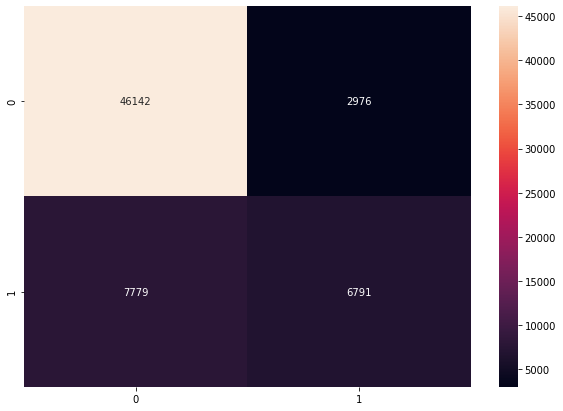

In [27]:
# Predicting the Test set results
y_pred=xgb_clf.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
cm
# Create a Comfusion matrix visually
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
# Print the accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score,recall_score,accuracy_score ,f1_score
print("Precision Score of XGB Classifier is",precision_score(y_test,y_pred))
print("Recall_score Score  of XGB Classifier is",recall_score(y_test,y_pred))
print("Accuracy Score of XGB Classifier is",accuracy_score(y_test,y_pred))
print("F1_score Score of XGB Classifier is",f1_score(y_test,y_pred))

# Feature Engineering

In [28]:
from sklearn.feature_selection import RFE
rfe = RFE(xgb_clf, 10)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['Department_1', 'Department_2', 'Available_Extra_Rooms', 'Bed_Grade',
       'Visitors_with_Patient', 'Severity_of_Illness_ordinal',
       'Type_of_Admission_code', 'Hospital_code', 'City_Code_Patient',
       'City_Code_Hospital'],
      dtype='object')

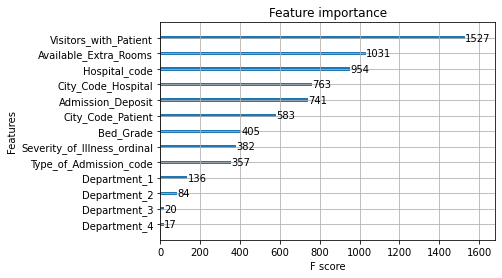

In [29]:
#Visualize the important features.
xgb.plot_importance(xgb_clf)

In [30]:
# Build the model again after Feature Selection

xgb_clf=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1000,objective='binary:logistic',max_depth=3)
xgb_clf.fit(X_train[X_train.columns[rfe.support_]],y_train)

xgb_test_score=xgb_clf.score(X_test[X_test.columns[rfe.support_]], y_test)
train_score=xgb_clf.score(X_train[X_train.columns[rfe.support_]], y_train)

print("Test score after best feature selection is",xgb_test_score," and Train score after best feature selection is ",train_score)

Test score after best feature selection is 0.831176987815601  and Train score after best feature selection is  0.8288792934249264


# K Fold Cross Validation

In [31]:
# K-fold Cross validation to different subsets of the training tests model works on every subset with 10 cv
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

xgb_clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=1000,objective='binary:logistic',max_depth=5)

kfold = StratifiedKFold(n_splits=10, shuffle=True)

model_dict={'random_frst':RandomForestClassifier(n_estimators=100),'log_reg':LogisticRegression(max_iter=1000,solver='liblinear'),'xgb_clf':xgb_clf}
table=[]

for key,value in model_dict.items():
    accuracies = cross_val_score(estimator = value, X= X_train, y = y_train, cv = kfold)
    print("Accuracy of ",key,"is",accuracies)
    print("Kfold Accuracy on model :",key ,"is  %.2f%% " % (np.mean(accuracies)*100))
    table.append([key,(np.mean(accuracies)*100)])
    
    print("")

Accuracy of  random_frst is [0.81432777 0.81417076 0.81621197 0.81860648 0.81216879 0.81424926
 0.81185476 0.81393523 0.81589794 0.81813543]
Kfold Accuracy on model : random_frst is  81.50% 

Accuracy of  log_reg is [0.82123651 0.82135427 0.82147203 0.82155054 0.82531894 0.81841021
 0.82174681 0.81680079 0.81864573 0.82045142]
Kfold Accuracy on model : log_reg is  82.07% 

Accuracy of  xgb_clf is [0.83419038 0.83744848 0.82885182 0.83324828 0.83348381 0.83658489
 0.8357213  0.83426889 0.83548577 0.83689892]
Kfold Accuracy on model : xgb_clf is  83.46% 



In [32]:
table
df_table=pd.DataFrame(table,columns=['Model','K-fold Accuracy'],index=[1,2,3])
df_table=df_table.sort_values(by=['K-fold Accuracy'],ascending=False)
#df_table

In [33]:
#Comparision of Kfold accuracy and normal accuracy with top 3 performing models
accuracy=[random_frst_test_score *100,log_reg_test *100,xgb_test_score *100]
accuracy=pd.DataFrame(accuracy,index=[1,2,3])

accuracy.columns=['Accuracy without Kfold']
accuracy=accuracy.sort_values(by=['Accuracy without Kfold'],ascending=False)
frame=[df_table,accuracy]
acc_table=pd.concat(frame,axis=1)
acc_table

Model  K-fold Accuracy  Accuracy without Kfold
3      xgb_clf        83.461825               83.117699
2      log_reg        82.069872               82.353034
1  random_frst        81.495584               81.640183

# Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def build_model():
  model = Sequential()
  model.add(Dense(1024, input_dim=(14), activation='relu'))
  model.add(Dense(156,  activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model



In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


estimator = KerasClassifier(build_fn=build_model, epochs=30, batch_size=1000, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 82.74% (0.28%)
